# TimeSeries - homework 1
* Lior   - 305218331
* Stav   - 204761621
* Yftach - 301594990

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt
import statsmodels.api as sm


from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.pylab import rcParams

In [72]:
data = pd.read_csv('/kaggle/input/electric-production/Electric_Production.csv')
data.head(3)

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502


In [73]:
data=data.dropna()
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True) #set date as index
data.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [74]:
def production_graph(df):
    fig = plt.figure(figsize=(15, 7))
    plt.xlabel('DATE')
    plt.ylabel('Value')
    plt.title('production graph')
    plt.plot(df)
def moving_average(df):
    fig = plt.figure(figsize=(15, 7))
    plt.title('moving average')
    plt.plot(df, label='Normal Data')
    plt.plot(df.rolling(12).mean(), label='Moving Average')
    plt.legend()
    plt.show()
def trend(df):   
    plt.title('trend')
    result = seasonal_decompose(df) #result define
    result.observed.plot(label='Original remark')
    result.trend.plot(label='Trend',figsize=(15, 7))
    plt.legend()
    plt.show()
def seasonality(df):  
    plt.title('Seasonality')
    result = seasonal_decompose(df)
    result.seasonal.plot( marker='.',figsize=(15, 3))
    plt.show()
def Sstationarity_test(df):
    rolling_mean = df.rolling(window=12).mean()
    rolling_std = df.rolling(window=12).std()
    plt.figure(figsize = (15,7))
    plt.plot(df, color='cornflowerblue', label='Original')
    plt.plot(rolling_mean, color='firebrick', label='Rolling Mean')
    plt.plot(rolling_std, color='limegreen', label='Rolling Std')
    plt.xlabel('Date', size = 12)
    plt.ylabel('Electric Production', size  = 12)
    plt.legend(loc = 'upper left')
    plt.title('Rolling Statistics', size = 14)
    plt.show()
def residual(df):
    plt.title('Residual')
    result.resid.plot(figsize=(15, 7))
    plt.show()
def autocorrelation(df):
    plt.rc("figure", figsize=(15,7))
    acf = plot_acf(df,lags=30)
def pautocorrelation(df):
    plt.rc("figure", figsize=(15,7))
    pacf = plot_pacf(df,lags=30)
def seasonal_decomposition(df):
    df_seasonal_decompose = seasonal_decompose(df)
    df_seasonal_decompose.observed.plot(label='Original')
    df_seasonal_decompose.seasonal.plot(label='Seasonal',color='red')
    plt.legend()
    plt.title('Seasonal Decomposition')
    plt.show()
def seas_dec(df):
    result_additive=seasonal_decompose(df,model="additive",extrapolate_trend="freq")
    result_additive.plot()

# **4. plot data**

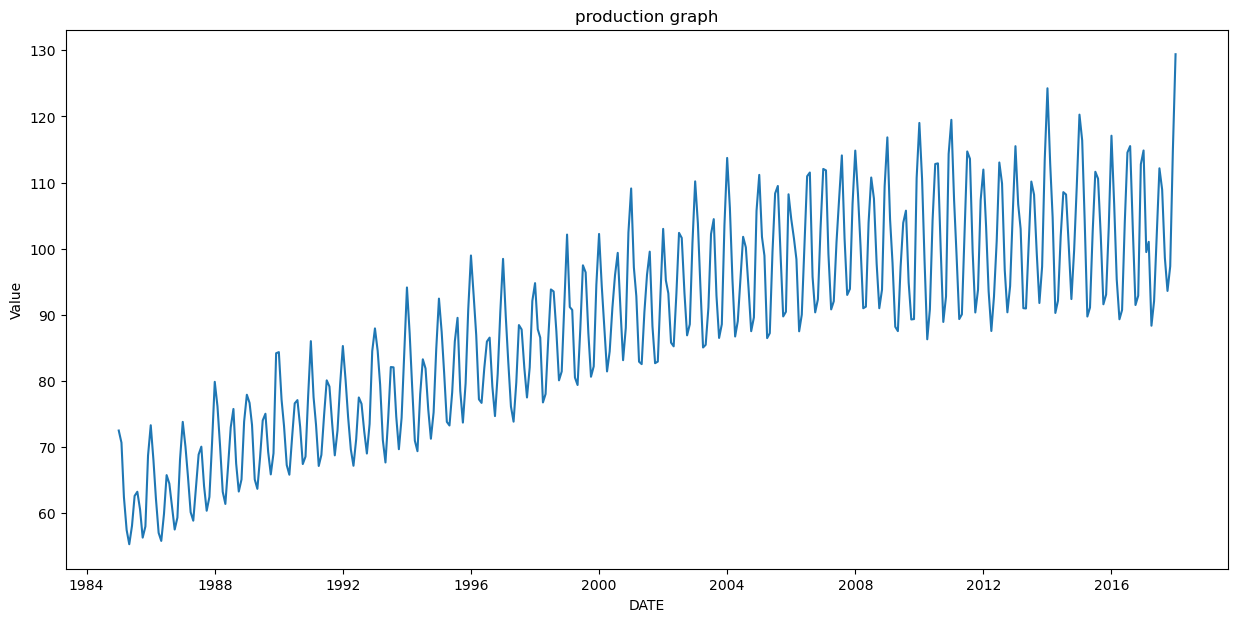

In [75]:
production_graph(data)

# **5. Moving average**

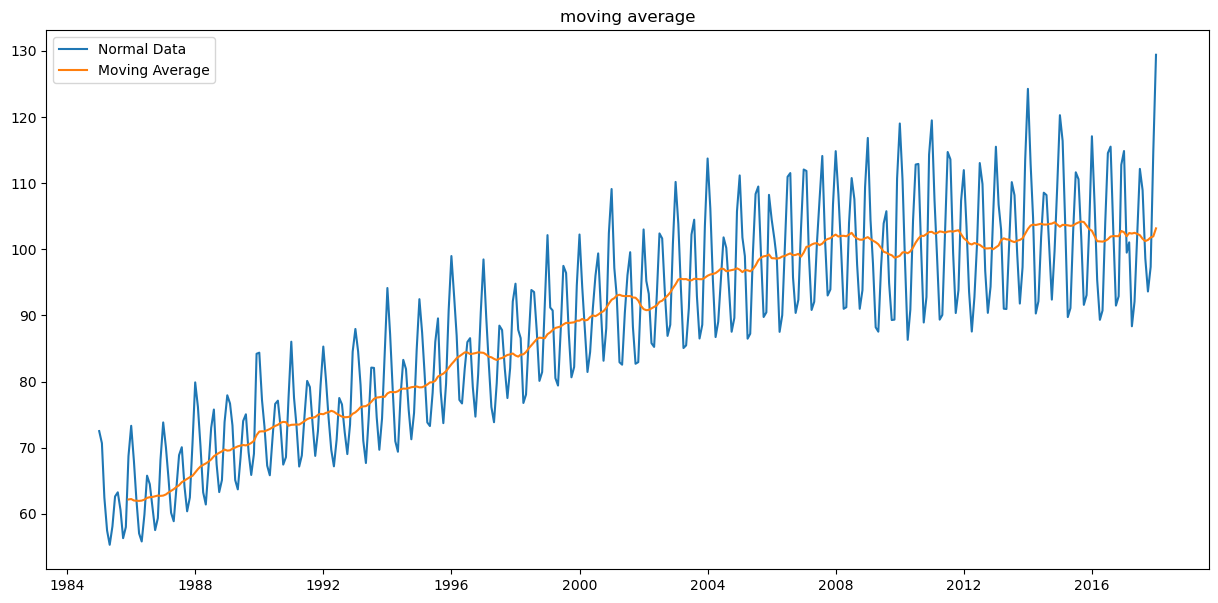

In [76]:
moving_average(data)

# **Trend**

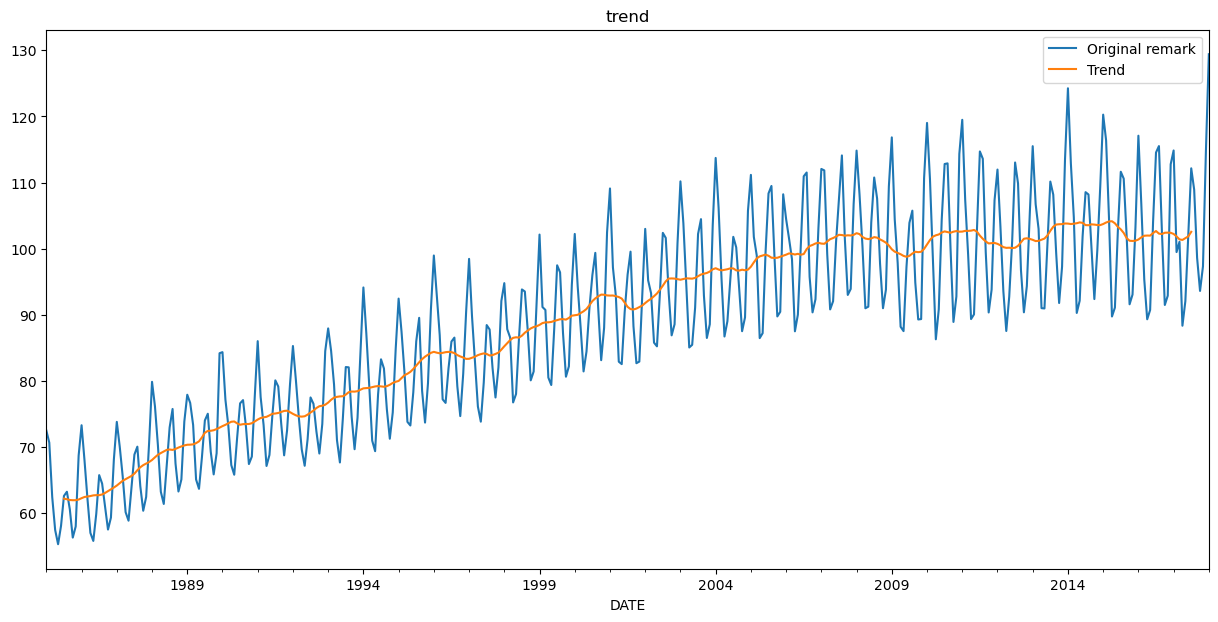

In [77]:
trend(data)

# **6. stationarity test**

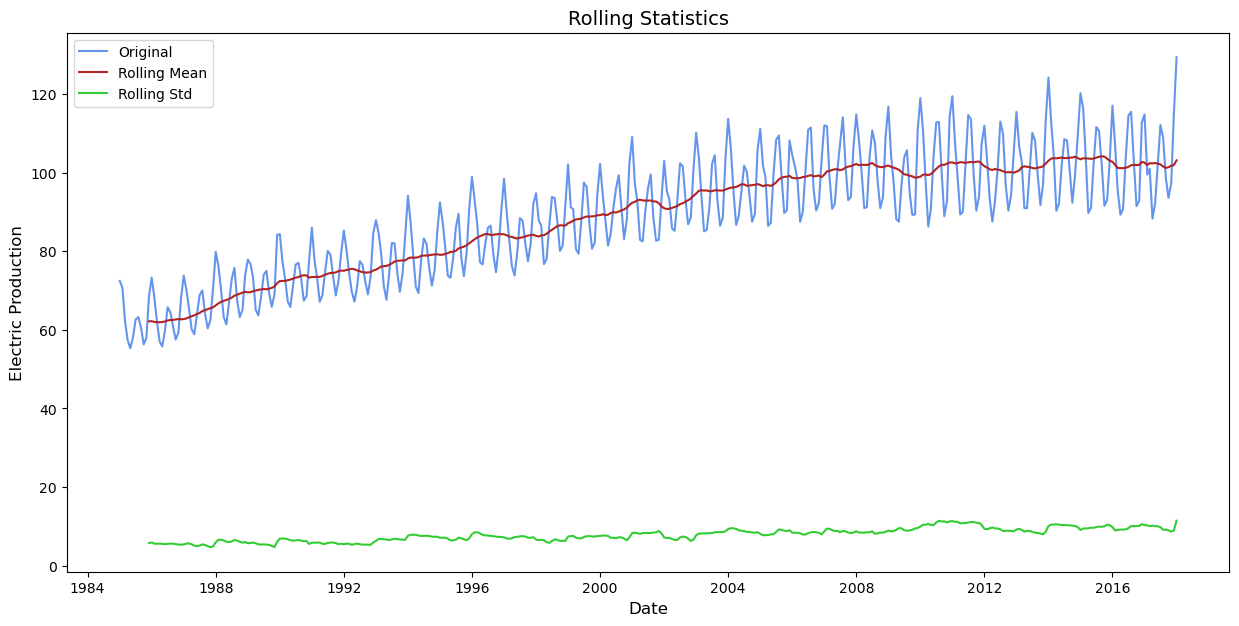

In [78]:
Sstationarity_test(data)

From the graph of moving avarege vs the original data, it easy to see that the consunption is increasing thru the years. Between years 2008-2016 the consumption begins to stedy. There is no stationarity in the data, the rolling mean is incresing and the std is not stedy

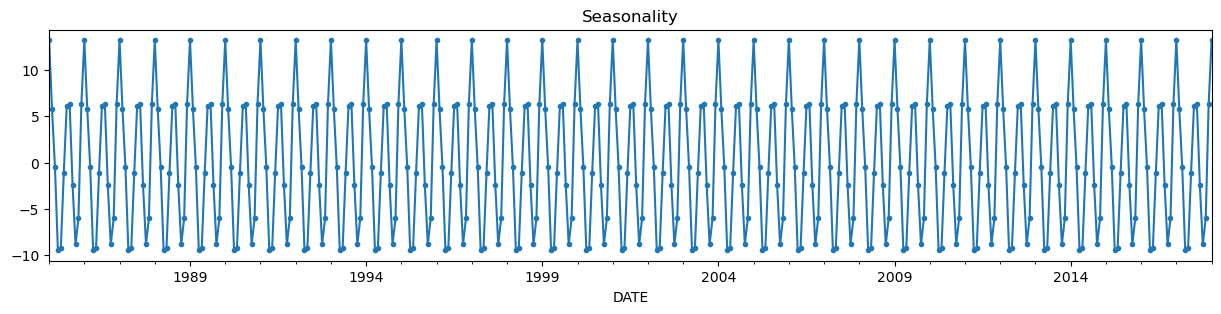

In [79]:
seasonality(data)

# **7. Autocorrelation**

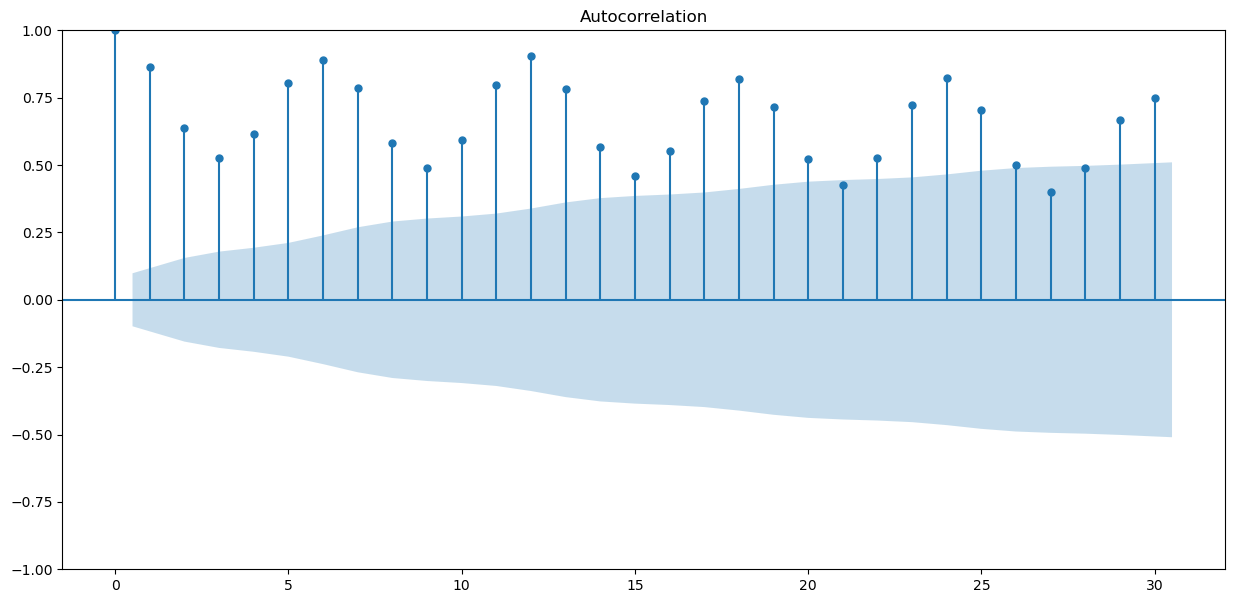

In [80]:
autocorrelation(data)

There is a clear cyclical pattern in the lags every multiple of 7. As our data is indexed by month, therefore the data is not annual seasonality. The strength of correlation is generally and slowly decreasing as the lags increase. This points to a trend in our data and it needs to be differentiated to make it stationary when modeling.

# **8. Autocorrelation fot AVG**

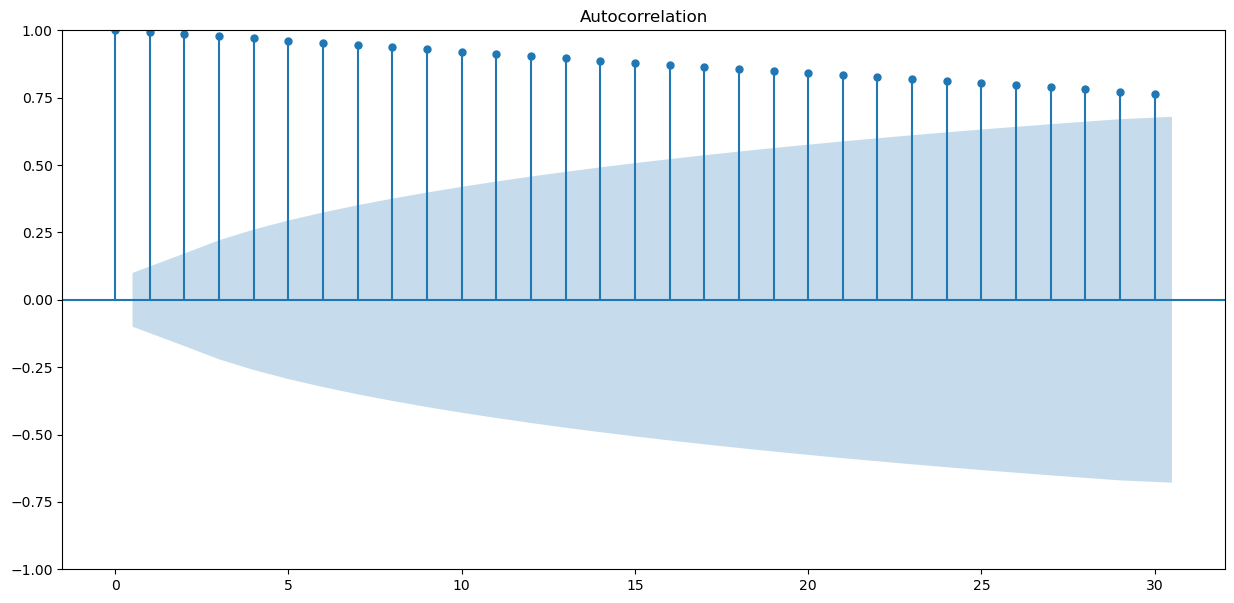

In [81]:
AVG = data.rolling(12).mean()
AVG=AVG.dropna()
autocorrelation(AVG)

# **9. The difference between section 7 and section 8**

The result can be seen as a liner line that slowly decreasing when number of lags grows, the result is very similar to the previous graph.

# **10. Trend**

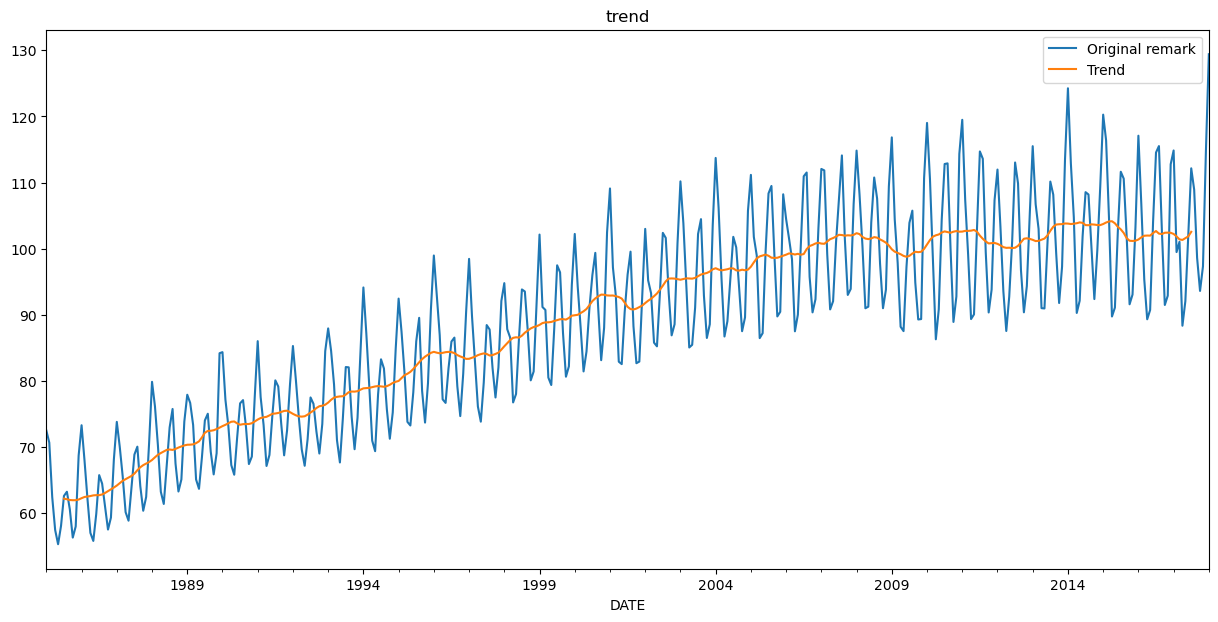

In [82]:
trend(data)

# 11. **Trend of AVG**

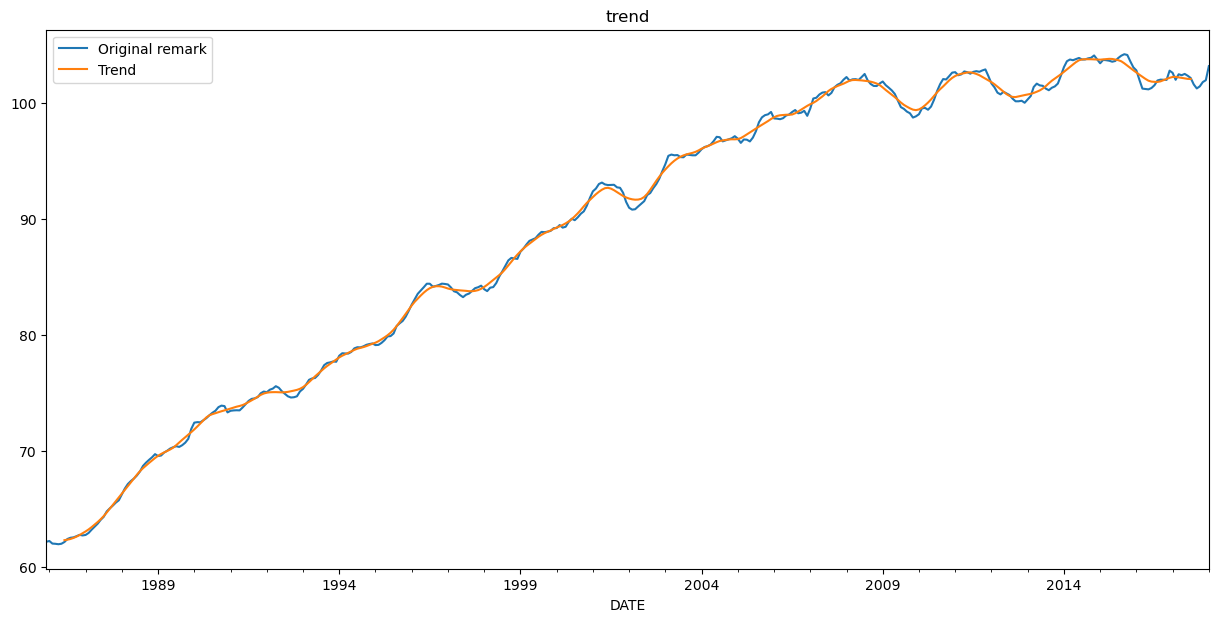

In [83]:
trend(AVG)

# **12. The difference between section 10 and section 11**

The tred is very similler to the moving average, the next graph will show the diffrence between them (if there is any).

# **13. seasonal decomposition plot**

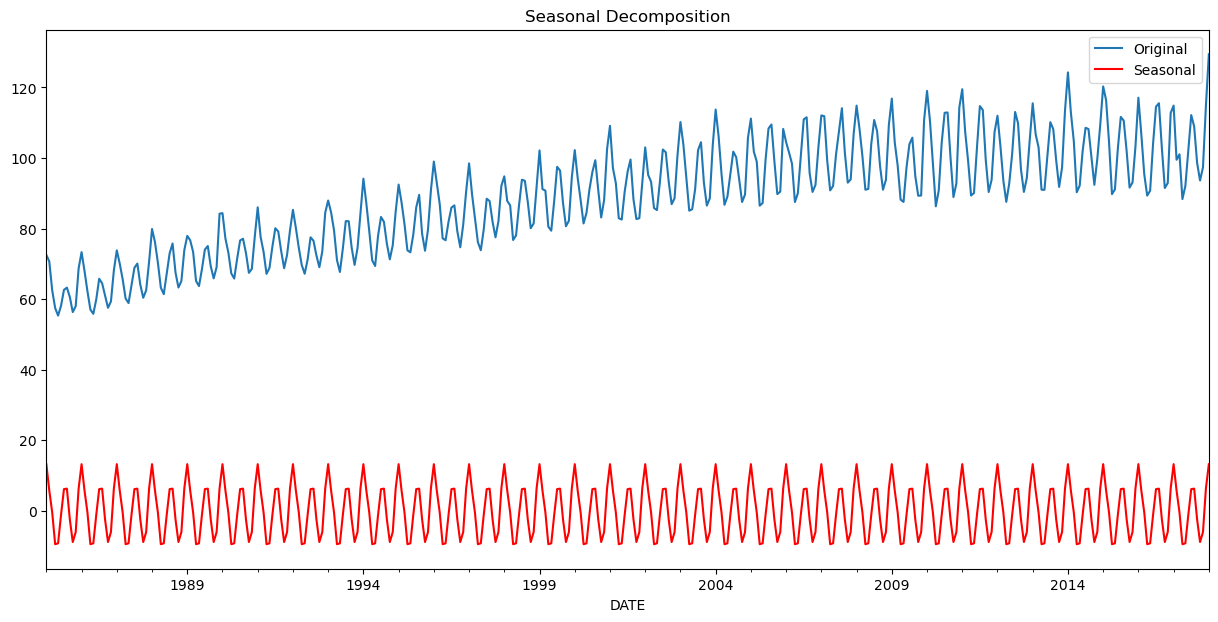

In [84]:
seasonal_decomposition(data)

Its seemes there are two kind of peaks probably summer and winter (heating and cooling incresing elecricity consumption).

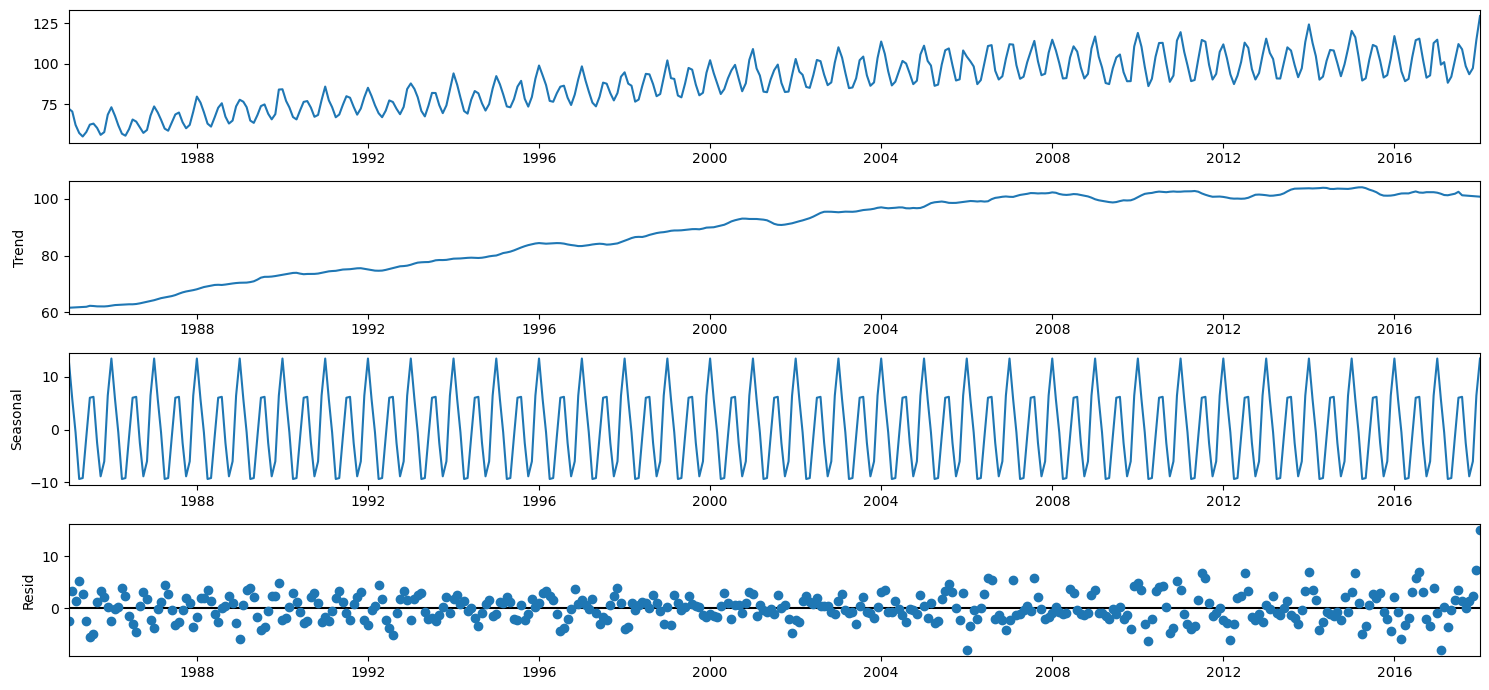

In [85]:
seas_dec(data)

# **seasonal decomposition of AVG**

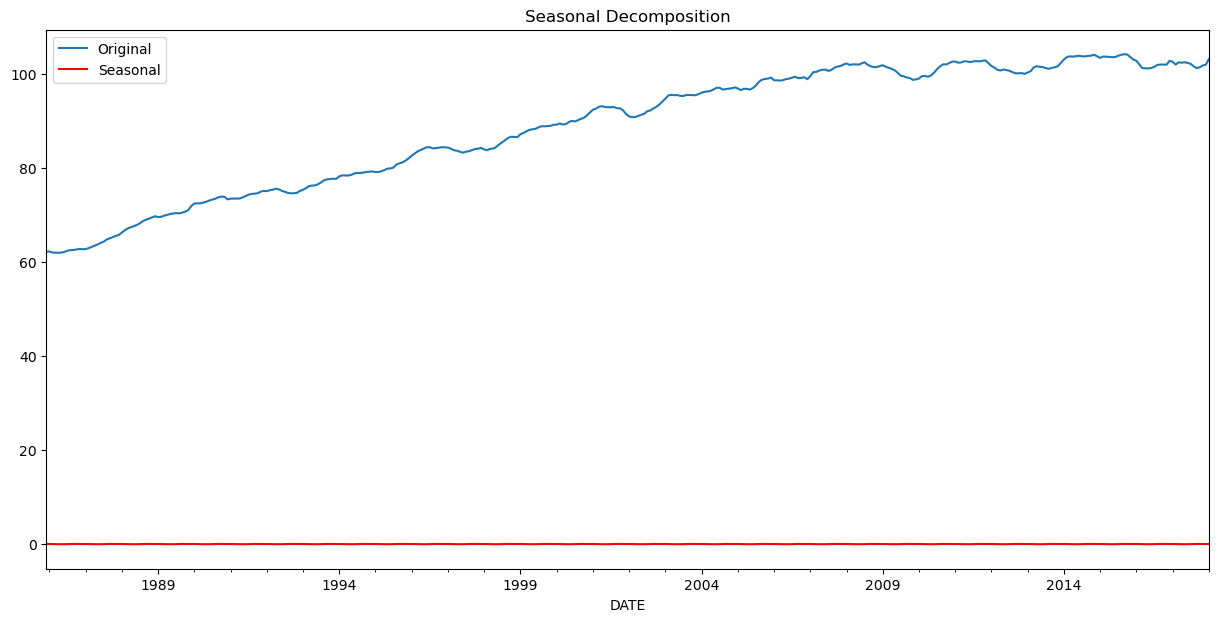

In [86]:
seasonal_decomposition(AVG)

The seasonal result is 0 for the rolling mean

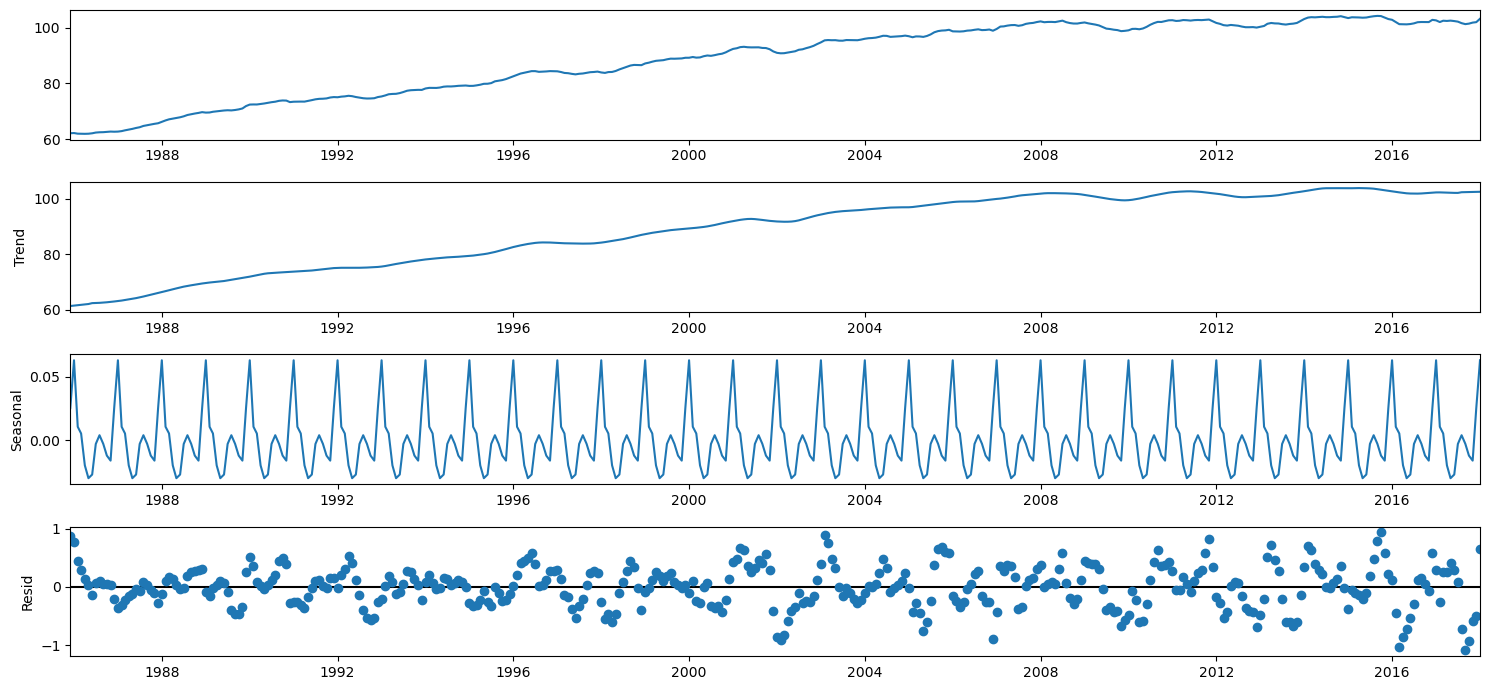

In [87]:
seas_dec(AVG)

# **16. Prediction** 
Now building a forecast model fot the data, using ARIMA (model to learn the pattern of the series). p → Number of autoregressive terms, d → Number of nonseasonal differences needed for stationarity, and q → Number of lagged forecast errors in the prediction equation.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  Co

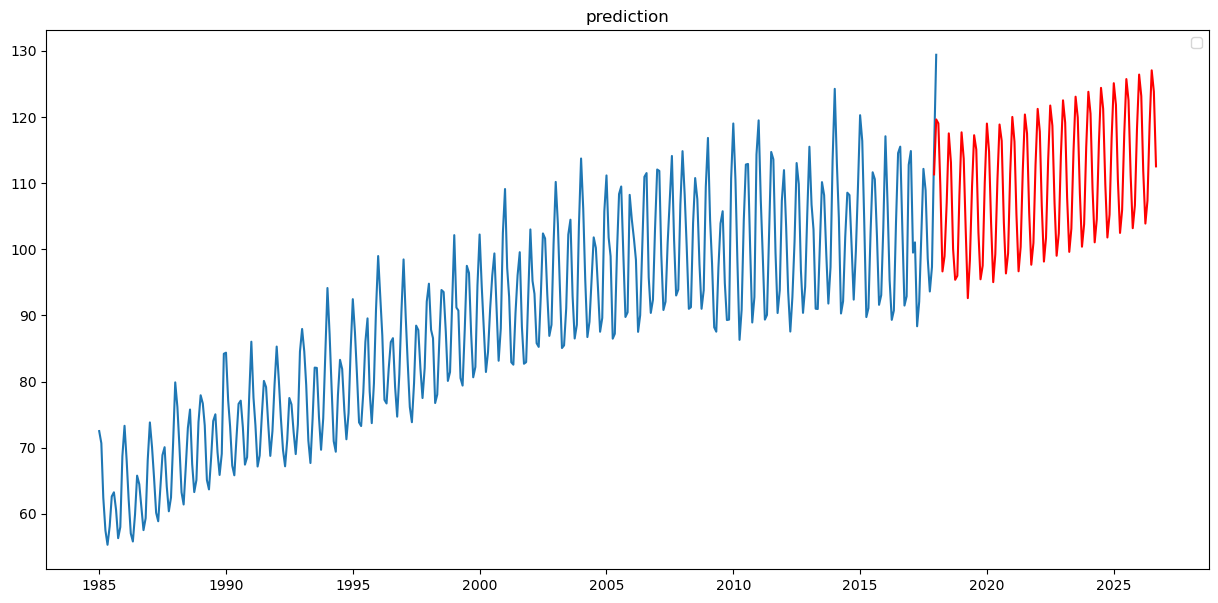

In [88]:
(p,d,q)=(7,2,12)
prediction = ARIMA(data, order=(p,d,q))
ARIMA_results = prediction.fit()
plt.plot(data)
plt.plot(ARIMA_results.predict(395,500), color='red')
plt.legend()
plt.title('prediction')
plt.show()

# **17. autocorrelation of 6/12/24 months** 

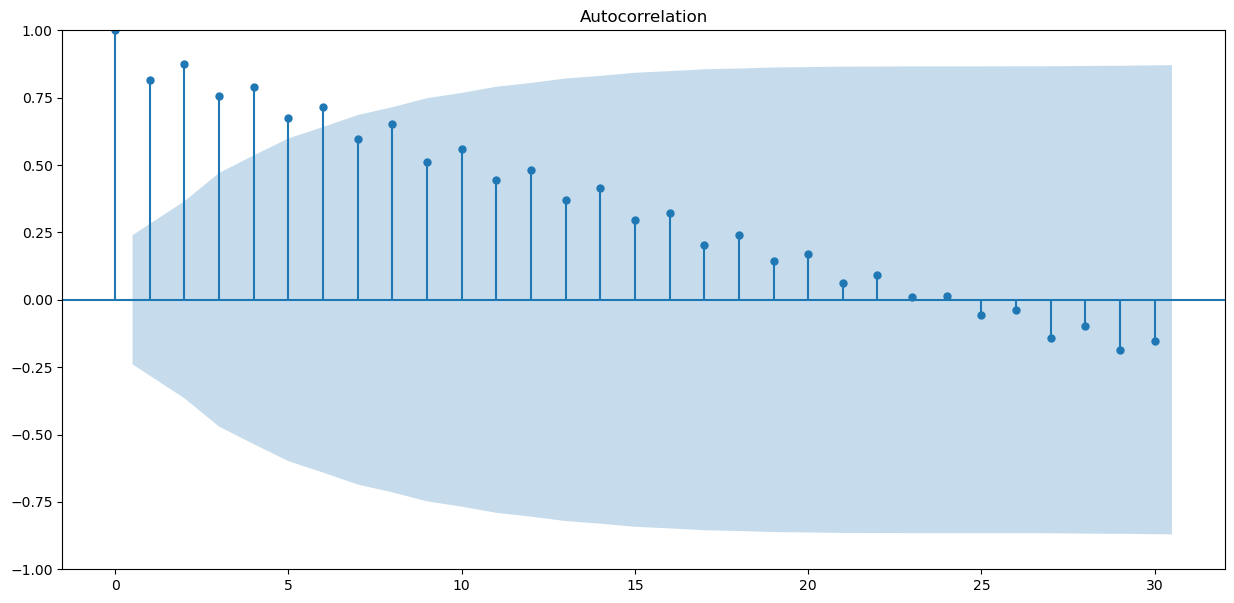

In [89]:
M_six = data.resample('6M').ffill()
M_six
autocorrelation(M_six)

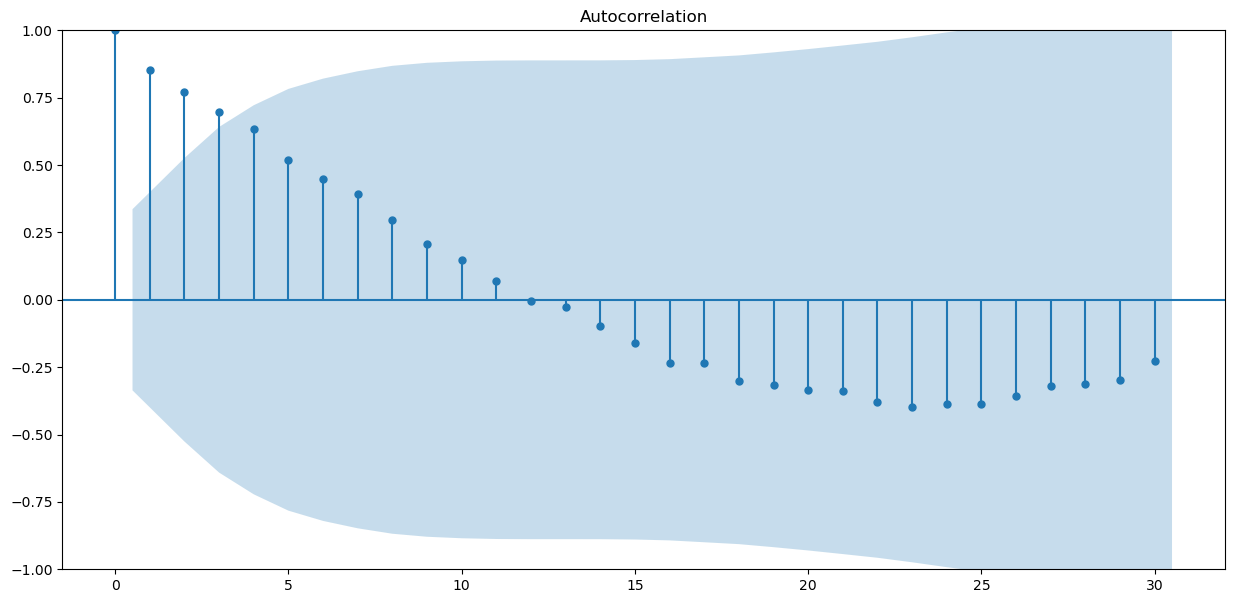

In [90]:
M_Twelve = data.resample('12M').ffill()
M_Twelve
autocorrelation(M_Twelve)

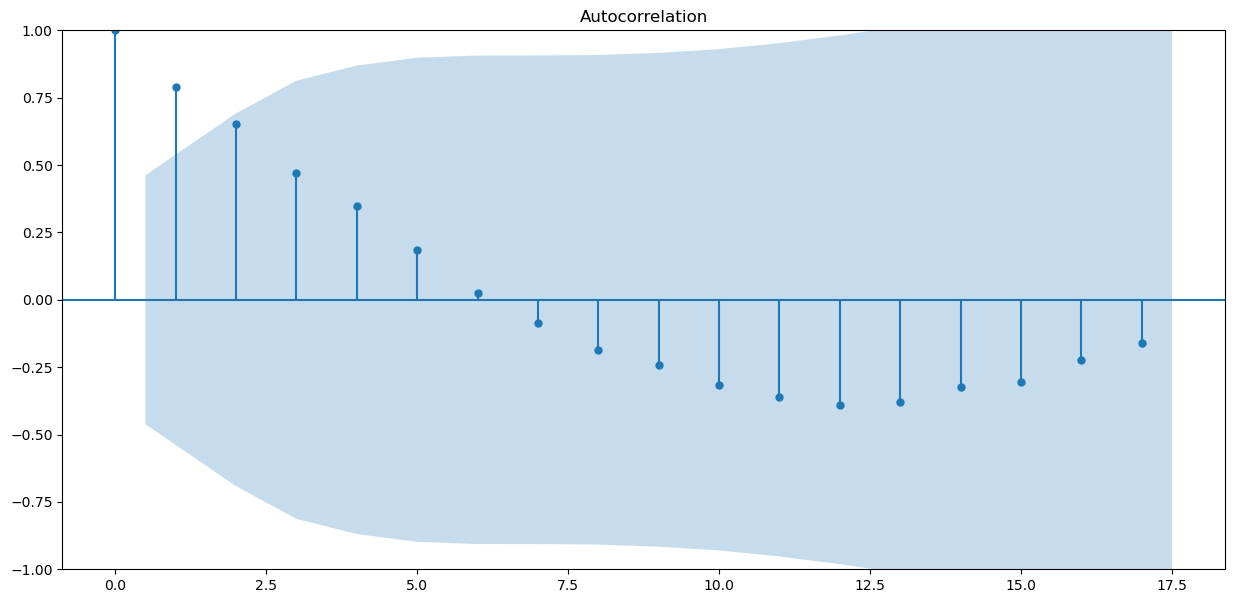

In [91]:
def short_autocorrelation(df):
    plt.rc("figure", figsize=(15,7))
    acf = plot_acf(df,lags=17)

M_twenty_four = data.resample('24M').ffill()
M_twenty_four
short_autocorrelation(M_twenty_four)

Plot lagged TS in lags of 6 months is best correlated

# **18. Downsampling the data to quarters**

In [92]:
Q = data.resample('Q').ffill()

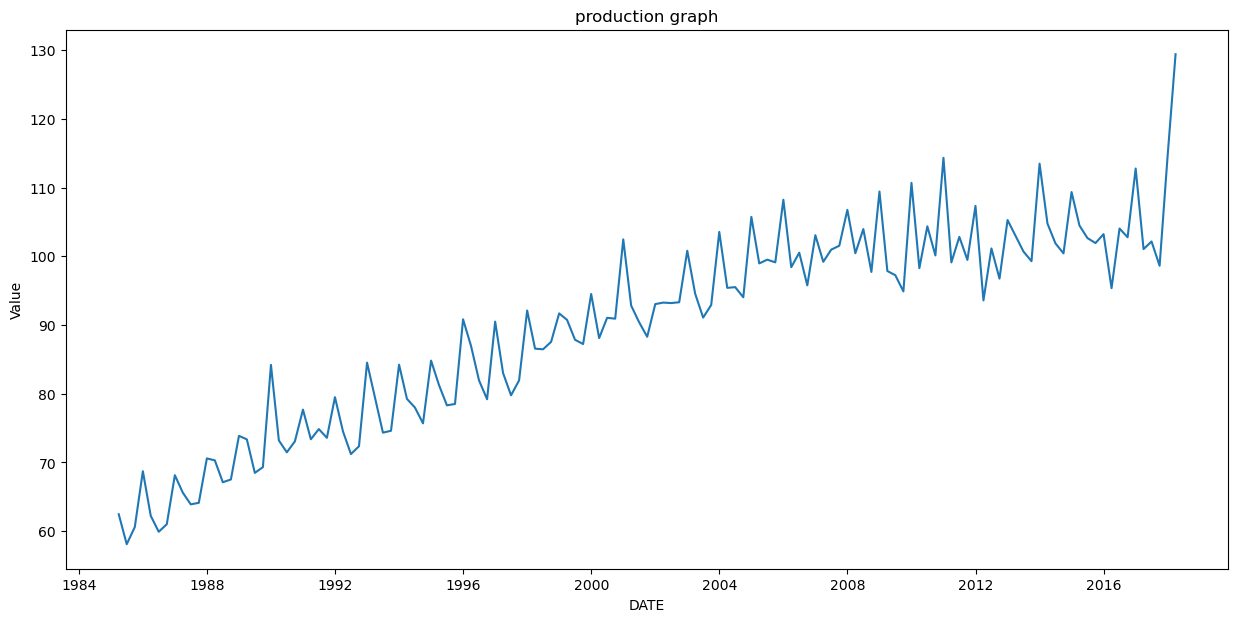

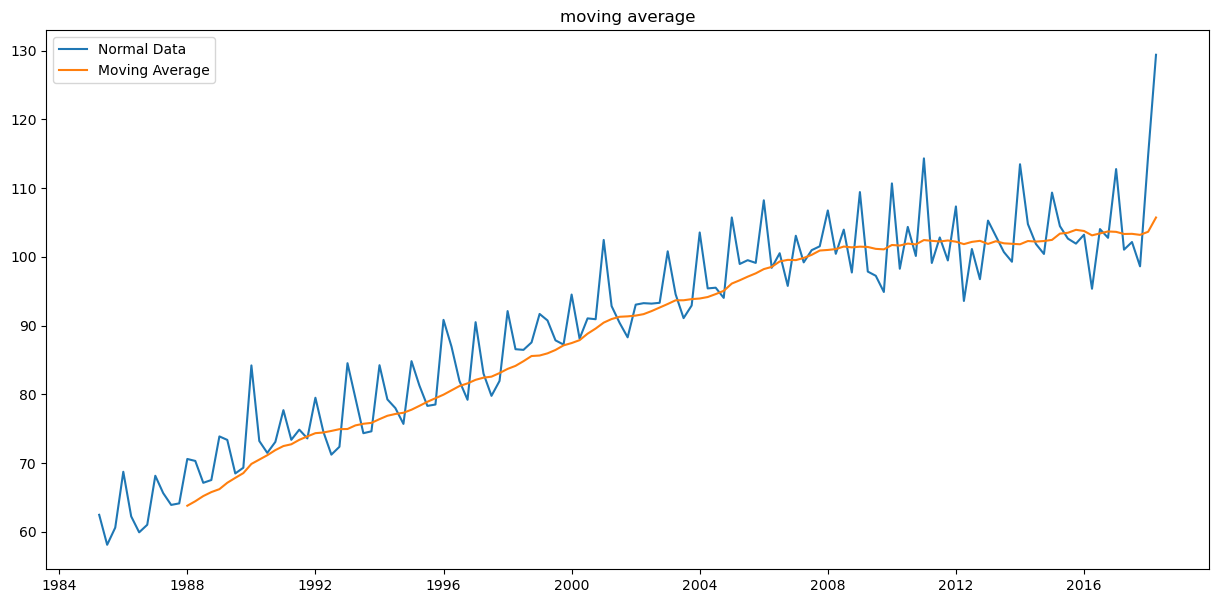

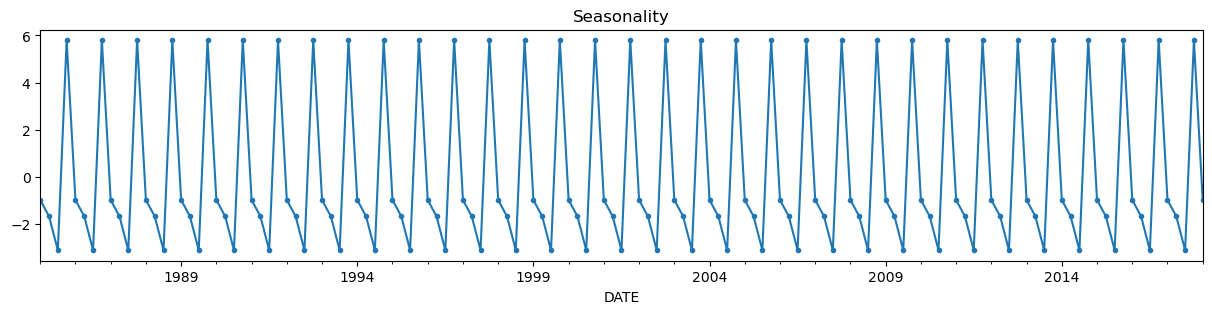

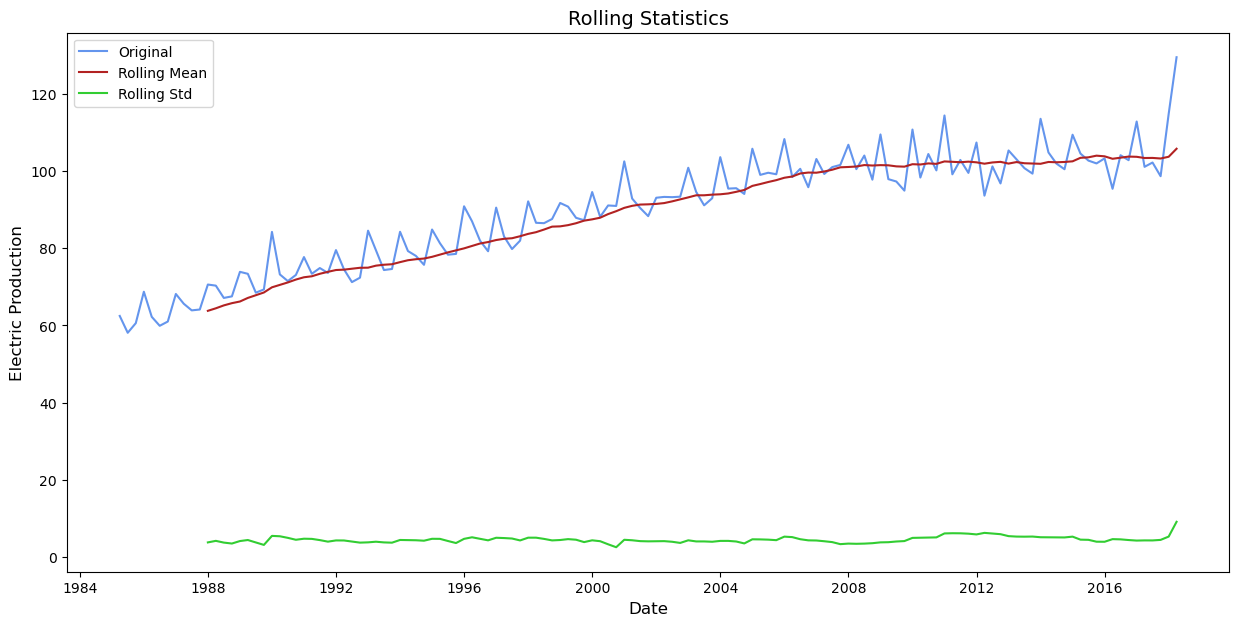

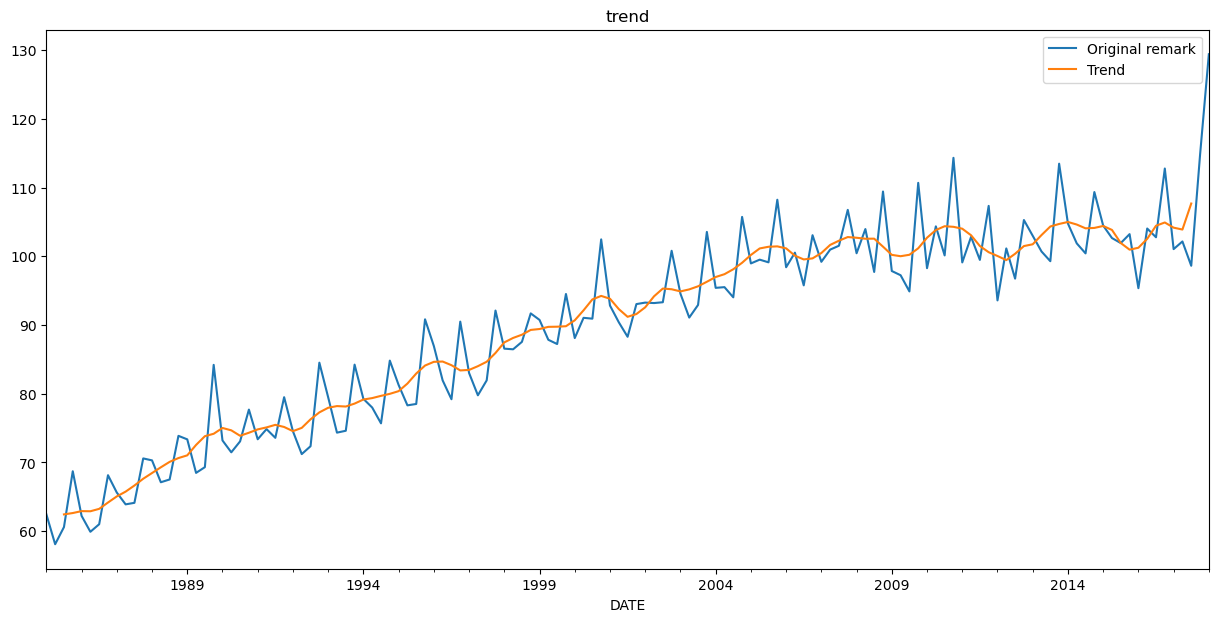

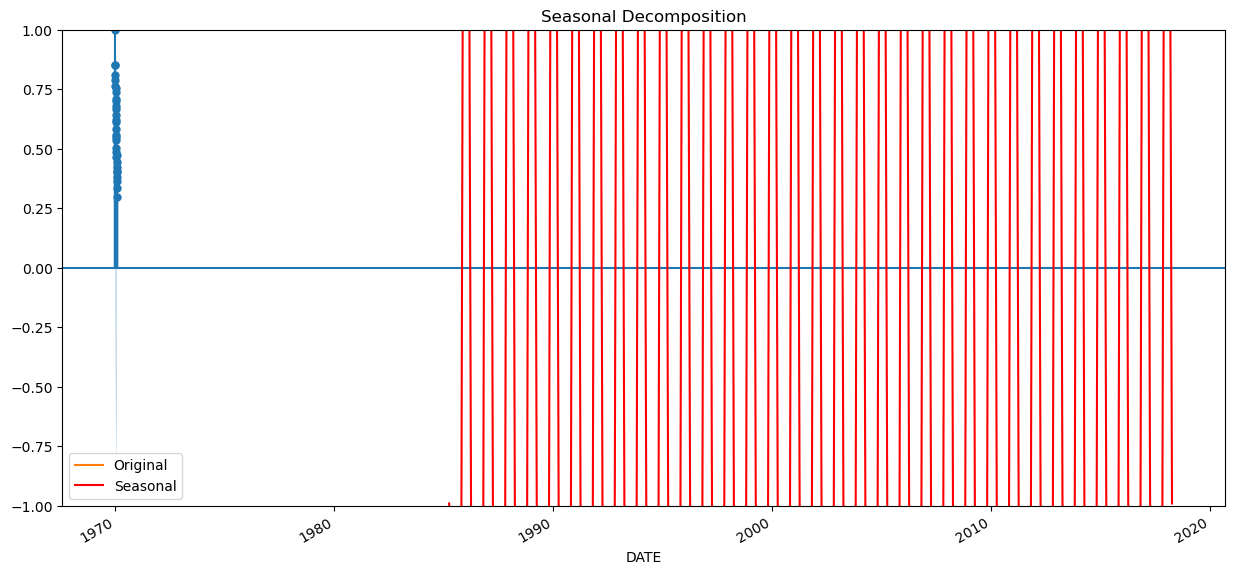

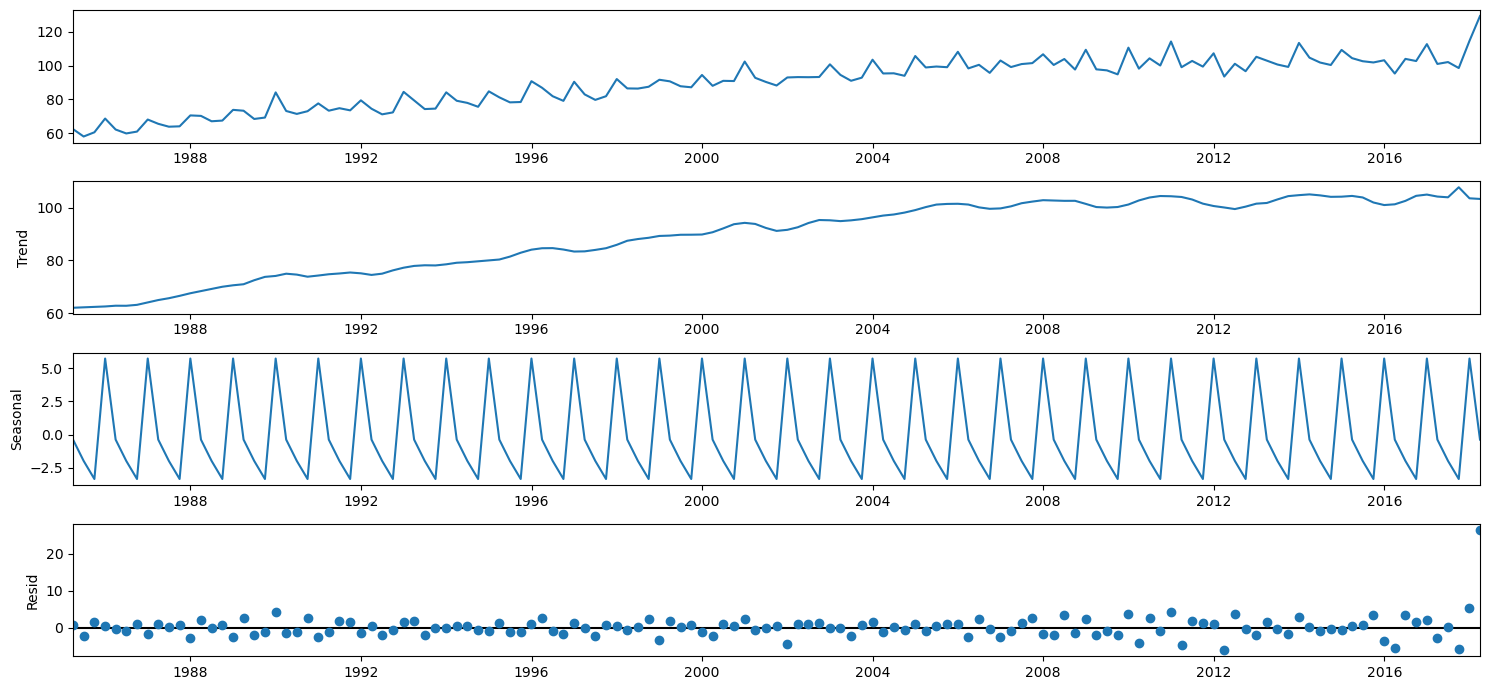

In [93]:
production_graph(Q)
moving_average(Q) 
seasonality(Q)  
Sstationarity_test(Q)
trend(Q)  
autocorrelation(Q)
seasonal_decomposition(Q)
seas_dec(Q)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


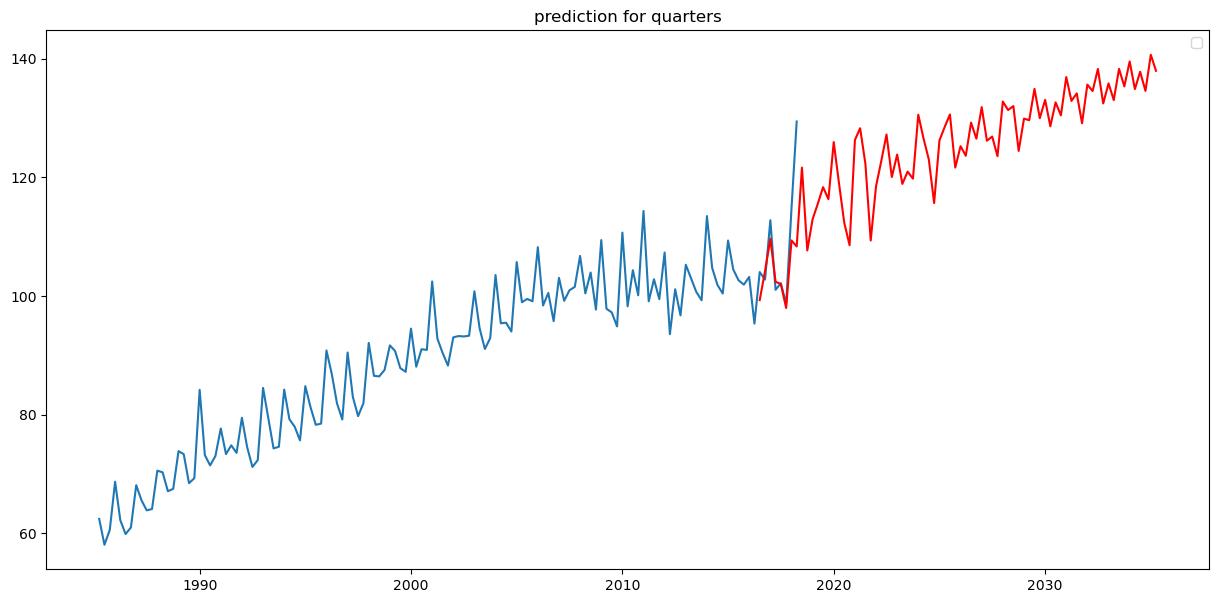

In [94]:
from statsmodels.tsa.arima.model import ARIMA
(p,d,q)=(7,1,4)
prediction_quarters = ARIMA(Q, order=(p,d,q))
ARIMA_results = prediction_quarters.fit()
plt.plot(Q)
plt.plot(ARIMA_results.predict(125,200), color='red')
plt.legend()
plt.title('prediction for quarters')
plt.show()